In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-22 11:55:04,465: Credentials are already in use. The existing account in the session will be replaced.



 Totla count for 00 and 11 are:  {'00': 487, '11': 513}


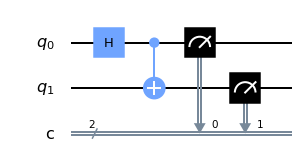

In [9]:
# Create a quantum circuit acting on the q register
circuit = QuantumCircuit(2,2)

# Adda H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0,1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1],[0,1])

# Execute

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

#Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# return counts
counts = result.get_counts(circuit)
print("\n Totla count for 00 and 11 are: ", counts)

# Analyze

# Draw the cricuit
circuit.draw()

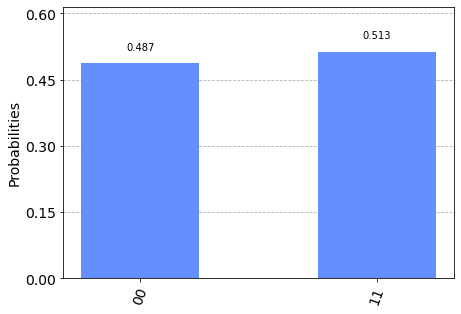

In [10]:
# Analyzing via Histogram
plot_histogram(counts)

### Understanding:
1. We start with the required imports.
2. Creating Circuit
    - We instantiate a circuit with 2 qubits and two classical bits.
    - We start building circuit by adding differnt gates. First we add a Hammard gate H on qubit 0. Hammard gate acts on a single bit and superpose the bit; that means that a bit will have equal probabilities to become 1 or 0.
    - Then we added another gate controlled not gate. Controlled not gate operates on two qubits where first bit is use to control. The CNOT gate flips the second qubit if and only if the first qubit (the control qubit) is 1.
    - Then we added measure where we mapped the qubits to classical bits.
3. Execution
    - There are different simulators available for backend; we have used qasm_simulator. We can choose the simulators based on our desired requirement/result.
    - execute method is used to execute the simulator with 1000 run to the circuit.
    - We can get the result from the job object, which we get from execute.
    - Based on our used simulator we can then fetch desired information from result objects. Here as we have used qasm_simulator we are fetching the count of 00 and 01; as each run of this circuit will result these bit string.
4. Visulaization
    - We have visualized the prbabilities of 01 and 11 using matplotlib internal funtions.
    - We can also visualize the circuits.